# Newton interpolating polynomials

This method creates a **Difference Table** to obtain a (n-1)th order polynomial passing through n data points. Using the polynomial interpolated valus of the dependent variable can be obtained by substituting the intermediate value of the independent variable into the polynomial. 

## Code: `newtonInt` function

In [ ]:
def newtonInt(x, y, xx):
  """
  newtonInt: Newton interpolating polynomials

  newtonInt(x,y,xx): Uses an (n - 1)th order Newton interpolating polynomials
  using n data points (x, y) to determine the intermediate yy value at a given
  xx independent varialble value
  Input:
    x: independent variable
    y: dependent variable
    xx: intermediate value of the independent variable
  Output:
    yy = interpolated value of dependent variable
  """
  # check if x and y vectors have the same length. If not show an error message
  assert x.shape[0] == y.shape[0], "x and y lengths are not the same"
  n = x.shape[0]  # number of elements in x
  # Building the difference table
  b = np.zeros((n,n),float)  # initiate the difference table as a nxn matrix containing zeros
  b[:,0] = y  # assign y to the first column of b
  for col in range(1,n):         #loop over columns
    for row in range(0,n-col):   #loop over rows
      b[row,col] = (b[row+1, col-1] - b[row, col-1]) / (x[row+col] - x[row])  # divided differences
  # At this point the difference table is created    
  # Using the difference table to interpolate
  prod = 1.
  yy = b[0,0]
  for i in range(0,n-1):
    prod = prod * (xx - x[i])   # product of x differences
    yy = yy + b[0, i+1] * prod  # calculating the interpolated values
  return yy

### Example: 

Consider the vector $x=[1, 4, 6, 5]$. Calculate the vector $y$ as $y = \ln (x)$. Use Newton Interpolating polynomials to calculate $\ln(2)$ using $(x,y)$ data points. Calculate the true error involved in this interpolation.

In [ ]:
import numpy as np
x = np.array([1., 4., 6., 5.])
y = np.log(x)
print('x= ', x)
print('y= ', y)
x1 = 2
yy = newtonInt(x, y, x1)
print('Interpolated y(', x1,') =', yy)
print('True value y(', x1,') =', np.log(x1))
print('True error = ', abs((np.log(x1) - yy) / np.log(x1)) * 100, '%')

x=  [1. 4. 6. 5.]
y=  [0.         1.38629436 1.79175947 1.60943791]
Interpolated y( 2 ) = 0.6287685789084135
True value y( 2 ) = 0.6931471805599453
True error =  9.28786893420309 %


We can also plot the polynomial as fgollows. We observe that the polynomial passes through **all** the data points as it should.

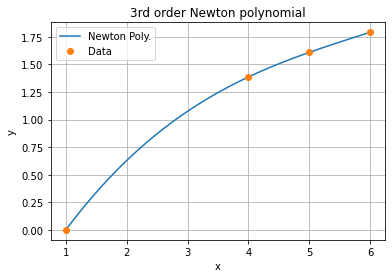

In [ ]:
import matplotlib.pyplot as plt
xp = np.linspace(np.min(x), np.max(x))
yp = newtonInt(x, y, xp)  # getting the interpolated values at all xp array elements to plot
plt.plot(xp,yp, label='Newton Poly.')
plt.plot(x,y,'o', label='Data')
plt.grid(True)
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('3rd order Newton polynomial')
plt.show();

# Lagrange interpolated polynomials


In Lagrange polynomials we create a a (n-1)th order polynomial passing through **all** n data points. The polynomial is built by adding the dependent variable values with weights. Using the polynomial interpolated valus of the dependent variable can be obtained by substituting the intermediate value of the independent variable into the polynomial. We can observe the interpolated value of $y$ at $x=2$ which is consistent with our calculations.

## Code: `lagrangeInt` function

In [ ]:
def lagrangeInt(x, y, xx):
    """
    lagrangeInt: Lagrange interpolating polynomial

    lagrangeInt(x,y,xx): Uses an (n - 1)th order Lagrange interpolating polynomials
    using n data points (x, y) to determine the intermediate yy value at a given
    xx independent varialble value
    Input:
      x: independent variable
      y: dependent variable
      xx: intermediate value of the independent variable
    Output:
      yy = interpolated value of dependent variable
    """
    import numpy as np
    # check if x and y vectors have the same length. If not show an error message
    assert x.shape[0] == y.shape[0], "x and y lengths are not the same"
    n = x.shape[0]  # number of elements in x
    sum = 0.
    for i in range(n):
        product = y[i]      #set product=y(i) initially
        for j in range(n):  #calculate the product 
            if i != j:      #for all j values except for i=j
                product = product * (xx - x[j]) / (x[i] - x[j])  #calculating the Li * yi terms
        sum = sum + product
    yy = sum
    return yy

### Example: 

Solve the previous example on calculaitng $\ln(2)$ using Lagrange interpolating polynomials and compare the results.

In [ ]:
import numpy as np
x = np.array([1., 4., 6., 5.])
y = np.log(x)
x1 = 2
yy = lagrangeInt(x, y, x1)
print('Interpolated y(', x1,') =', yy)
print('True value y(', x1,') =', np.log(x1))
print('true error = ', abs((np.log(x1) - yy) / np.log(x1)) * 100, '%')

Interpolated y( 2 ) = 0.6287685789084136
True value y( 2 ) = 0.6931471805599453
true error =  9.287868934203074 %


The results obtained using Newton and Lagrange interpolating polynomial are practically the same (except for the round-off error). We can also plot the polynomial as shown below which results in a plot similar to that with Newton's polynomial.

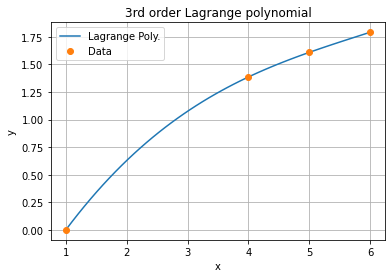

In [ ]:
import matplotlib.pyplot as plt
xp = np.linspace(np.min(x), np.max(x))
yp = lagrangeInt(x, y, xp)  # getting the interpolated values at all xp array elements to plot
plt.plot(xp,yp, label='Lagrange Poly.')
plt.plot(x,y,'o', label='Data')
plt.grid(True)
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('3rd order Lagrange polynomial')
plt.show();

# Using `polyfit` and `polyval`

We can use `polyfit` of order $n-1$ to find the polynomial for $n$ data points. **Note, that the order of the polynomial must be $n-1$ so that it passes through all the data points since we are doing interpolation.** Then, we use `polyval` to find the interpolated value.

Interpolated y( 2 ) = 0.6287685789084118
True value y( 2 ) = 0.6931471805599453
true error =  9.287868934203345 %



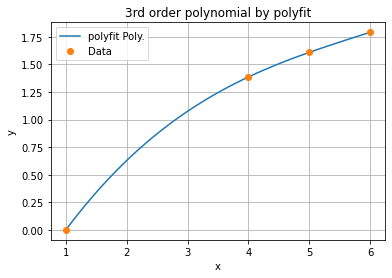

In [ ]:
import numpy as np
x = np.array([1., 4., 6., 5.])
y = np.log(x)
x1 = 2
n = x.shape[0]
p = np.polyfit(x, y, n - 1)
yy = np.polyval(p,x1)
print('Interpolated y(', x1,') =', yy)
print('True value y(', x1,') =', np.log(x1))
print('true error = ', abs((np.log(x1) - yy) / np.log(x1)) * 100, '%')
print()
# Plotting the polynomial
import matplotlib.pyplot as plt
xp = np.linspace(np.min(x), np.max(x))
yp = np.polyval(p, xp)  # getting the interpolated values at all xp array elements to plot
plt.plot(xp,yp, label='polyfit Poly.')
plt.plot(x,y,'o', label='Data')
plt.grid(True)
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('3rd order polynomial by polyfit')
plt.show();

Similar results to Newton Lagrange polynomials are obtained with `polyfit`.

# Exercise

Generate data points for the sine function between $0$ and $2\pi$. Generate 9 data points from the function and based on those, approximate the function using Newton and Lagrange polynomials. Compare the results with `polyfit`.